In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
sale_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\4. Test interview\Sale.csv', encoding = 'Latin-1')

In [3]:
def remove_commas(text):
  return text.replace(",", "")
sale_df['Retail Price'] = sale_df['Retail Price'].apply(remove_commas)
sale_df['Listing price'] = sale_df['Listing price'].apply(remove_commas)
sale_df['Entry price'] = sale_df['Entry price'].apply(remove_commas)

In [4]:
sale_df[['Listing price','Entry price','Retail Price']] = sale_df[['Listing price','Entry price','Retail Price']].astype(int)

In [5]:
sale_df['Month'] = pd.to_datetime(sale_df['Month'], dayfirst=True)

In [6]:
sale_df['Month1'] = sale_df['Month'].dt.month_name()
sale_df['weekday']= sale_df['Month'].dt.day_name()

In [7]:
sale_df

,Month,Name,Contract No,Listing price,Entry price,Retail Price,Month1,weekday
0,2023-09-01,Camry,HD-2309-00023,1245454545,1192963636,1206963636,September,Friday
1,2023-09-01,Camry,HD-2309-00023,1245454545,1192963636,1206963636,September,Friday
2,2023-09-01,Camry,HD-2309-00023,1245454545,1192963636,1206963636,September,Friday
3,2023-09-01,Camry,HD-2309-00023,1245454545,1192963636,1206963636,September,Friday
4,2023-09-02,Vios,HD-2309-00002,545454545,512790909,518790909,September,Saturday
...,...,...,...,...,...,...,...,...
267,2023-11-30,Vios,HD-2311-00018,545454545,509790909,524790909,November,Thursday
268,2023-11-30,Vios,HD-2311-00009,545454545,509790909,523790909,November,Thursday
269,2023-11-30,Vios,HD-2311-00018,545454545,509790909,524790909,November,Thursday
270,2023-11-30,Vios,HD-2311-00009,545454545,509790909,523790909,November,Thursday


In [25]:
sale_df.groupby(['Month1','Name'])['Entry price'].mean()

Month1     Name         
November   Camry            1.191464e+09
           Corolla Cross    8.340455e+08
           Vios             5.097909e+08
October    Camry            1.192964e+09
           Corolla Cross    8.360455e+08
           Vios             5.042444e+08
September  Camry            1.192964e+09
           Corolla Cross    8.360455e+08
           Vios             5.127909e+08
Name: Entry price, dtype: float64

In [8]:
df1 = sale_df.groupby(['Month1','Name'])['Retail Price'].sum()
df1

Month1     Name         
November   Camry            14387563632
           Corolla Cross    27065454528
           Vios             39800109084
October    Camry            15653527268
           Corolla Cross    10993590902
           Vios             28186709086
September  Camry            12057636360
           Corolla Cross    12693681810
           Vios             24439172723
Name: Retail Price, dtype: int64

In [9]:
sale_df['profit'] = sale_df['Retail Price'] - sale_df['Entry price']
sale_df['discount'] = (sale_df['Listing price'] - sale_df['Retail Price'])/sale_df['Listing price']

In [20]:
df = sale_df.groupby(['Month1','Name']).agg(profit_mean=('profit' ,np.mean),
                                            Revenue=('Retail Price' ,np.sum),
                                            Discount=('discount' ,np.mean),
                                            Car_sold=('Retail Price',np.size),
                                           Profit=('profit',np.sum)).reset_index().sort_values(by='Month1',ascending=False)
df

,Month1,Name,profit_mean,Revenue,Discount,Car_sold,Profit
6,September,Camry,1.280000e+07,12057636360,0.031869,10,128000000
7,September,Corolla Cross,1.020000e+07,12693681810,0.033364,15,153000000
8,September,Vios,7.191489e+06,24439172723,0.046699,47,338000000
3,October,Camry,1.115385e+07,15653527268,0.033190,13,145000000
4,October,Corolla Cross,9.615385e+06,10993590902,0.034032,13,125000000
5,October,Vios,1.773170e+07,28186709086,0.043044,54,957511819
0,November,Camry,7.500000e+06,14387563632,0.037328,12,90000000
1,November,Corolla Cross,1.175000e+07,27065454528,0.033879,32,376000000
2,November,Vios,1.389474e+07,39800109084,0.039910,76,1056000000


Text(0.5, 1.0, 'Tổng lợi nhuận')

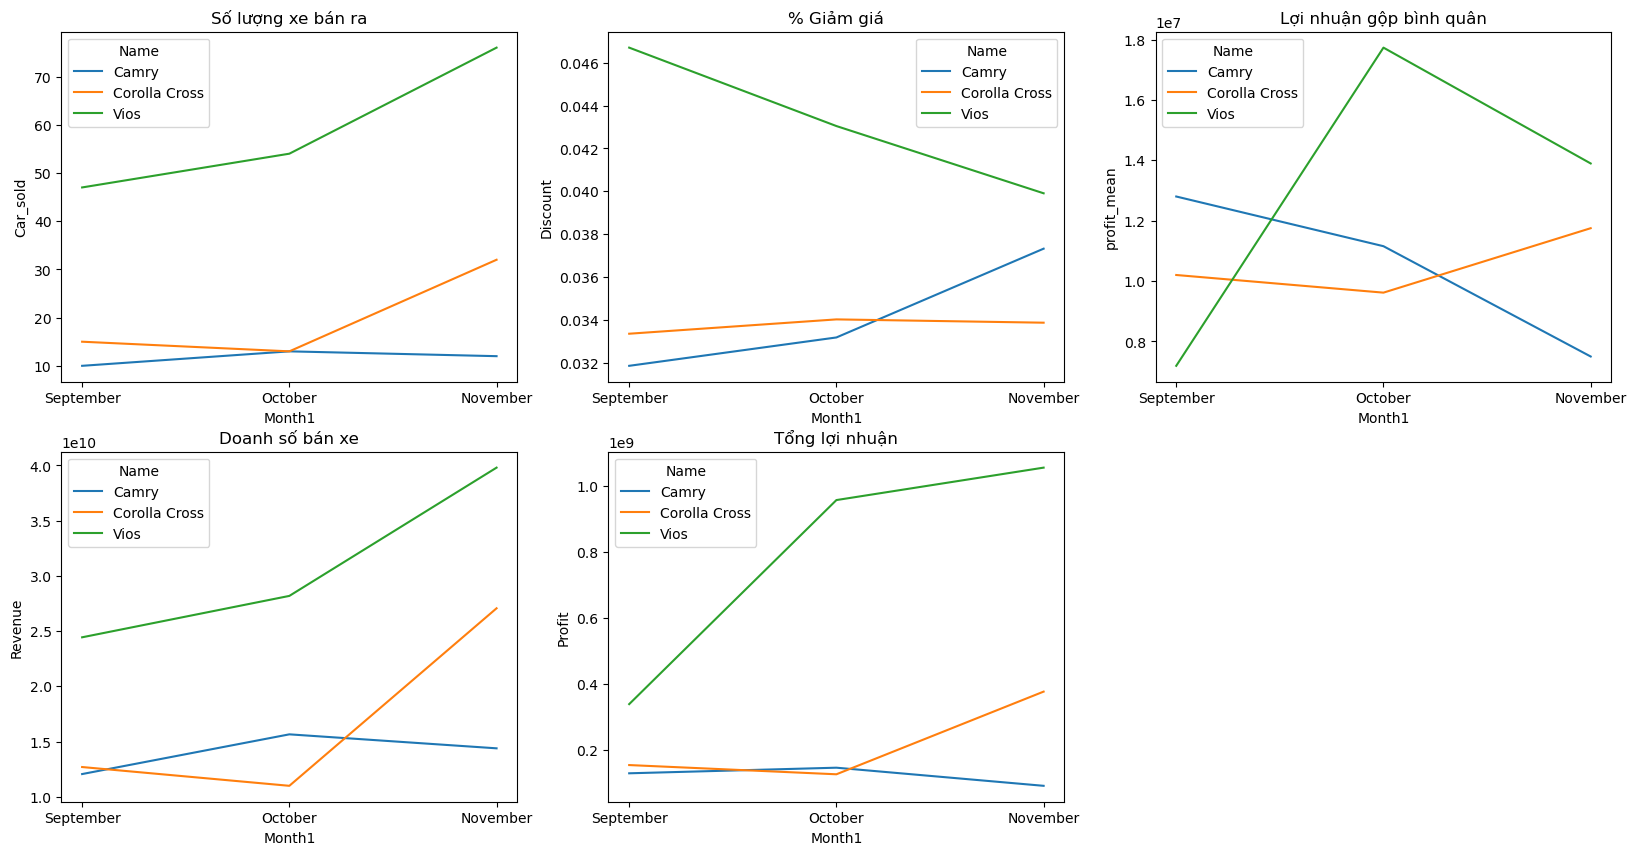

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.lineplot(data=df,x='Month1',y='Car_sold',hue='Name')
plt.title("Số lượng xe bán ra")
plt.subplot(232)
sns.lineplot(data=df,x='Month1',y='Discount',hue='Name')
plt.title("% Giảm giá")
plt.subplot(233)
sns.lineplot(data=df,x='Month1',y='profit_mean',hue='Name')
plt.title("Lợi nhuận gộp bình quân")
plt.subplot(234)
sns.lineplot(data=df,x='Month1',y='Revenue',hue='Name')
plt.title("Doanh số bán xe")
plt.subplot(235)
sns.lineplot(data=df,x='Month1',y='Profit',hue='Name')
plt.title("Tổng lợi nhuận")

In [22]:
df2 = df.pivot_table(values='Car_sold', index='Month1',columns = 'Name').sort_values(by='Month1',ascending=False)
df2

Name,Camry,Corolla Cross,Vios
Month1,,,
September,10.0,15.0,47.0
October,13.0,13.0,54.0
November,12.0,32.0,76.0


In [23]:
df3 = df.pivot_table(values='profit_mean', index='Month1',columns = 'Name').sort_values(by='Month1',ascending=False)
df3

Name,Camry,Corolla Cross,Vios
Month1,,,
September,1.280000e+07,1.020000e+07,7.191489e+06
October,1.115385e+07,9.615385e+06,1.773170e+07
November,7.500000e+06,1.175000e+07,1.389474e+07


### Nhận xét tình hình kinh doanh
Trong tháng 11 showroom đã bán được tổng cộng 120 chiếc xe, tăng 40 chiếc so với tháng 10. Tuy nhiên trong 3 xe thì chỉ có số lượng xe Camry được bán ra đã bị giảm từ 13 xuống còn 12.   
Đi sâu hơn vào trong dữ liệu thì chúng ta có thể trích xuất ra được dữ liệu giảm giá.   
Lợi nhuận gộp bình quân từ tháng 10 sang tháng 11 giảm khá là đáng kể, tuy nhiên chính sách giảm giá của showroom cũng giảm trong thời gian đó, có thể suy ra được rằng giá nhập xe đã tăng.   
Xem xét chính sách giảm giá và so với số liệu số lượng xe bán ra, chúng ta có thể thấy có sự tương quan âm. Ở đây có thể kết luận rằng có nhiều thứ tác động vào người tiêu dùng hơn là giá cả khi mua xe. 